<a href="https://colab.research.google.com/github/SangminAhn21/DL_Study/blob/main/Python_DeepLearning_PyTorch/PART_04/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.9.0+cu111  Device: cuda


## **MLP(Multi Layer Perceptron) 을 사용한 CIFAR-10 데이터 분류**

In [3]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
train_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',
                                      train = True,
                                      download = True,
                                      transform = transforms.ToTensor())
test_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',
                                      train = False,
                                      transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = False)

Files already downloaded and verified


In [ ]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


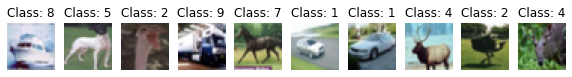

In [ ]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i],(1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [7]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
                Epoch, batch_idx * len(image),
                len(train_loader.dataset), 100. * batch_idx / len(train_loader),
                loss.item()))

In [8]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
for Epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n'.
          format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000(0%)]	Train Loss: 2.306833
Train Epoch: 1 [6400/50000(13%)]	Train Loss: 1.827698
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.634965
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 1.537640
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 2.103445
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.666934
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 1.765063
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.674679

[EPOCH: 1], 	Test Loss: 0.0525, 	Test Accuracy: 40.65 % 

Train Epoch: 2 [0/50000(0%)]	Train Loss: 1.731987
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.885261
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 1.207103
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 1.449864
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 1.461338
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 1.720650
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 1.806628
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 1.643300

[EPOCH: 2], 	Test Loss: 0.0513, 	Test Accuracy: 41.29 % 

Train Epoch: 3

## CNN(Convolutional Neural Network)을 사용한 CIFAR-10 데이터 분류

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels = 3,
            out_channels = 8,
            kernel_size = 3,
            padding = 1)
        self.conv2 = nn.Conv2d(
            in_channels = 8,
            out_channels = 16,
            kernel_size = 3,
            padding = 1)
        self.pool = nn.MaxPool2d(
            kernel_size = 2,
            stride = 2)
        self.fc1 = nn.Linear(8 * 8 * 16, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = x.view(-1, 8 * 8 * 16)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x

In [ ]:
model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [ ]:
for Epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n'.
          format(Epoch, test_loss, test_accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/50000(0%)]	Train Loss: 2.305550
Train Epoch: 1 [6400/50000(13%)]	Train Loss: 1.905750
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.947636
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 1.797926
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 1.846080
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.411839
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 1.501742
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.441806

[EPOCH: 1], 	Test Loss: 0.0469, 	Test Accuracy: 45.65 % 

Train Epoch: 2 [0/50000(0%)]	Train Loss: 1.231907
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.423967
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 1.151305
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 1.573842
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 1.693853
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 1.228306
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 1.119634
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 1.502152

[EPOCH: 2], 	Test Loss: 0.0410, 	Test Accuracy: 52.73 % 

Train Epoch: 3

# Data Augmentation 기법을 통한 모델의 성능 향상

In [6]:
train_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',
                                      train = True,
                                      download = True,
                                      transform = transforms.Compose([
                                            transforms.RandomHorizontalFlip(),
                                            transforms.ToTensor(),
                                            transforms.Normalize((0.5, 0.5, 0.5),
                                            (0.5, 0.5, 0.5))]))

test_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',
                                      train = False,
                                      transform = transforms.Compose([
                                            transforms.RandomHorizontalFlip(),
                                            transforms.ToTensor(),
                                            transforms.Normalize((0.5, 0.5, 0.5),
                                            (0.5, 0.5, 0.5))]))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/CIFAR_10/cifar-10-python.tar.gz to ../data/CIFAR_10


In [ ]:
for Epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n'.
          format(Epoch, test_loss, test_accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/50000(0%)]	Train Loss: 2.922771
Train Epoch: 1 [6400/50000(13%)]	Train Loss: 0.989393
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 0.857930
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 0.722186
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 0.969584
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.345286
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 1.242913
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 0.657618

[EPOCH: 1], 	Test Loss: 0.0311, 	Test Accuracy: 65.49 % 

Train Epoch: 2 [0/50000(0%)]	Train Loss: 0.736250
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 0.906884
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 0.658911
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 0.968057
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 1.096690
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 1.086851
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 0.917862
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 0.822924

[EPOCH: 2], 	Test Loss: 0.0306, 	Test Accuracy: 65.93 % 

Train Epoch: 3

## **CIFA-10 데이터에 고급 CNN 모델을 적용해 성능 향상시키기(ResNet)**

In [11]:
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride = 1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes,
                               kernel_size = 3,
                               stride = stride,
                               padding = 1,
                               bias = False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes,
                               kernel_size = 3,
                               stride = 1,
                               padding = 1,
                               bias = False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size = 1,
                          stride = stride,
                          bias = False),
                nn.BatchNorm2d(planes))
        
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out
    

class ResNet(nn.Module):
    def __init__(self, num_classes = 10):
        super(ResNet, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(3, 16,
                kernel_size = 3,
                stride = 1,
                padding =1,
                bias = False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(16, 2, stride = 1)
        self.layer2 = self._make_layer(32, 2, stride = 2)
        self.layer3 = self._make_layer(64, 2, stride = 2)
        self.linear = nn.Linear(64, num_classes)
    
    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1] *(num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, 8)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [12]:
model = ResNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

In [13]:
for Epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n'.
          format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000(0%)]	Train Loss: 2.305044
Train Epoch: 1 [6400/50000(13%)]	Train Loss: 1.458316
Train Epoch: 1 [12800/50000(26%)]	Train Loss: 1.605291
Train Epoch: 1 [19200/50000(38%)]	Train Loss: 1.282340
Train Epoch: 1 [25600/50000(51%)]	Train Loss: 1.358122
Train Epoch: 1 [32000/50000(64%)]	Train Loss: 1.080977
Train Epoch: 1 [38400/50000(77%)]	Train Loss: 0.919080
Train Epoch: 1 [44800/50000(90%)]	Train Loss: 1.097784

[EPOCH: 1], 	Test Loss: 0.0339, 	Test Accuracy: 61.62 % 

Train Epoch: 2 [0/50000(0%)]	Train Loss: 1.026524
Train Epoch: 2 [6400/50000(13%)]	Train Loss: 1.224136
Train Epoch: 2 [12800/50000(26%)]	Train Loss: 1.114878
Train Epoch: 2 [19200/50000(38%)]	Train Loss: 0.936174
Train Epoch: 2 [25600/50000(51%)]	Train Loss: 1.008772
Train Epoch: 2 [32000/50000(64%)]	Train Loss: 0.918245
Train Epoch: 2 [38400/50000(77%)]	Train Loss: 0.845141
Train Epoch: 2 [44800/50000(90%)]	Train Loss: 0.952628

[EPOCH: 2], 	Test Loss: 0.0258, 	Test Accuracy: 71.46 % 

Train Epoch: 3

## **CIFAR-10 데이터에 대표적인 딥러닝 모델을 불러와 적용하기(ResNet34)**

In [ ]:
import torchvision.models as models

model = models.resnet34(pretrained = False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs 10)
model = model.to(DEVICE)

실행시키면 정확도가 77%정도 나온다 (pretrained = False)


In [ ]:
model = models.resnet34(pretrained = True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(DEVICE)

Fine-Tuning 하면 정확도가 81%정도가 나온다. (pretrained = True)